# Import Dataset

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Import dataset Iris
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)
print(data.shape)
print(data.head(20))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

# Plot dataset

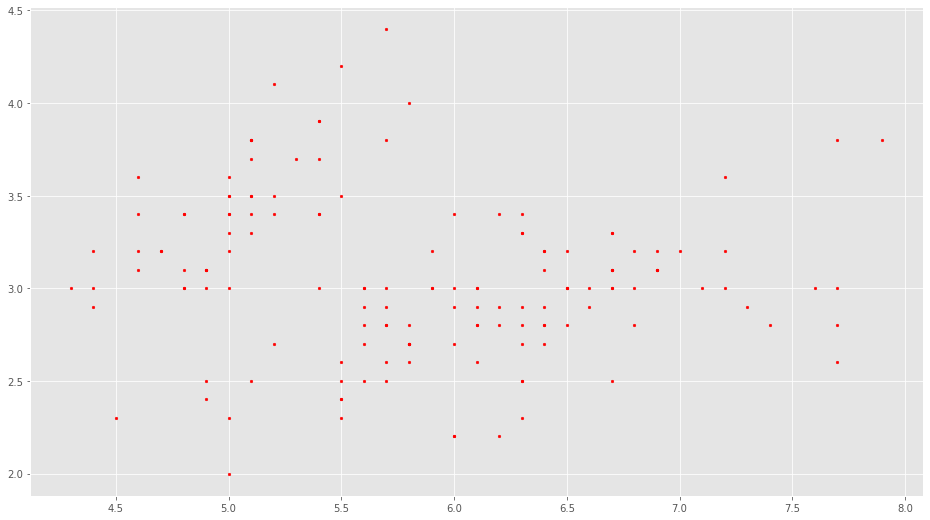

In [2]:
# Plot dataset untuk atribut sepal
f1 = data['sepal-length'].values
f2 = data['sepal-width'].values
XS = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)

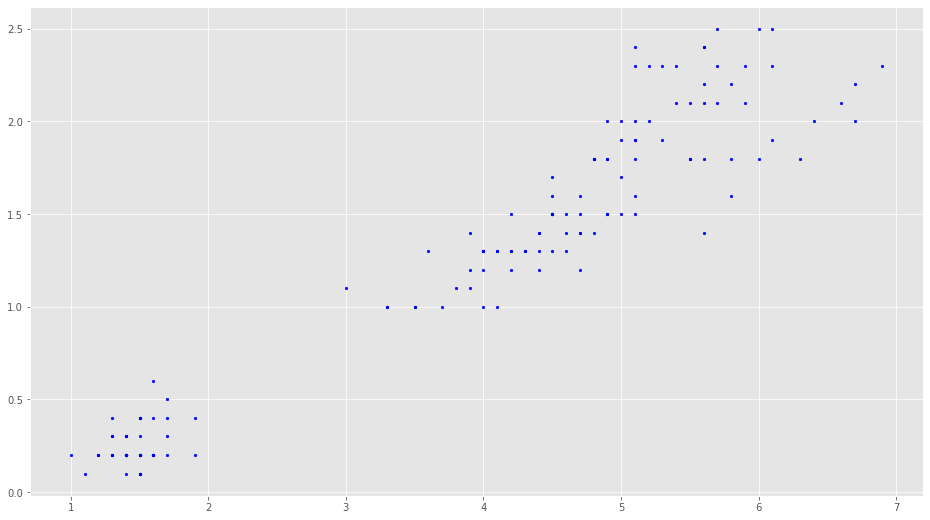

In [3]:
# Plot dataset untuk atribut petal
f3 = data['petal-length'].values
f4 = data['petal-width'].values
XP = np.array(list(zip(f3, f4)))
plt.scatter(f3, f4, c='blue', s=7)

# Melakukan Clustering

In [4]:
# Import library
from sklearn.cluster import KMeans

### Clustering atribut sepal

In [5]:
# Clustering atribut sepal
# Menentukan jumlah cluster
kmeansS = KMeans(n_clusters=3)
# Fitting input data
kmeansS = kmeansS.fit(XS)
# Mendapatkan cluster labels
labelsS = kmeansS.predict(XS)
# Mendapatkan nilai centroid
CS = kmeansS.cluster_centers_
print(CS)

[[5.006      3.418     ]
 [5.77358491 2.69245283]
 [6.81276596 3.07446809]]


### Clustering atribut petal

In [6]:
# Clustering atribut petal
# Menentukan jumlah cluster
kmeansP = KMeans(n_clusters=3)
# Fitting input data
kmeansP = kmeansP.fit(XP)
# Mendapatkan cluster labels
labelsP = kmeansP.predict(XP)
# Mendapatkan nilai centroid
CP = kmeansP.cluster_centers_
print(CP)

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


## Plot Hasil Clustering

### Plot hasil clustering atribut sepal

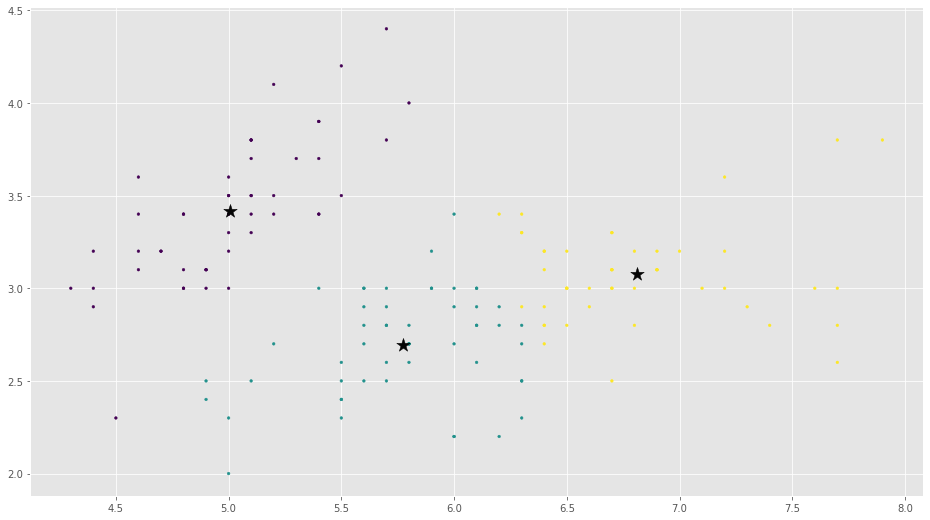

In [7]:
# Plot hasil clustering atribut sepal
plt.scatter(XS[:, 0], XS[:, 1], s=7, c=labelsS)
plt.scatter(CS[:, 0], CS[:, 1], marker='*', s=200, c='#050505')

### Plot hasil clustering atribut petal

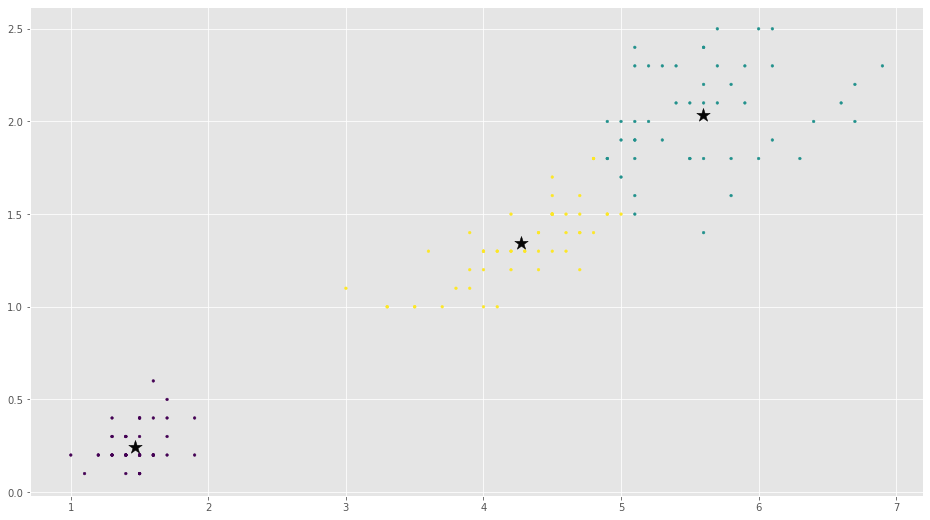

In [8]:
# Plot hasil clustering atribut petal
plt.scatter(XP[:, 0], XP[:, 1], s=7, c=labelsP)
plt.scatter(CP[:, 0], CP[:, 1], marker='*', s=200, c='#050505')

# Evaluasi Hasil Clustering

## Inertia

### Inertia atribut sepal

In [9]:
# Inertia atribut sepal
for k in range (1, 10):
    # Menentukan jumlah cluster
    kmeansS = KMeans(n_clusters=k, random_state=1)
    # Fitting input data
    kmeansS = kmeansS.fit(XS)
    # Mendapatkan cluster labels
    labelsS = kmeansS.predict(XS)
    # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    inertiaS = kmeansS.inertia_
    print ("k:", k, " cost:", inertiaS)
print ("")

k: 1  cost: 130.18093333333334
k: 2  cost: 57.98240604207882
k: 3  cost: 37.1237021276596
k: 4  cost: 27.98254281735862
k: 5  cost: 20.929315007091848
k: 6  cost: 17.23869523809524
k: 7  cost: 14.681790143190137
k: 8  cost: 12.865404761904761
k: 9  cost: 11.229455391351946



### Inertia atribut petal

In [10]:
# Inertia atribut petal
for k in range (1, 10):
    # Menentukan jumlah cluster
    kmeansP = KMeans(n_clusters=k, random_state=1)
    # Fitting input data
    kmeansP = kmeansP.fit(XP)
    # Mendapatkan cluster labels
    labelsP = kmeansP.predict(XP)
    # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    inertiaP = kmeansP.inertia_
    print ("k:", k, " cost:", inertiaP)
print ("")

k: 1  cost: 550.6434666666671
k: 2  cost: 86.40394533570999
k: 3  cost: 31.38775897435898
k: 4  cost: 19.50670086946704
k: 5  cost: 13.999613141025645
k: 6  cost: 11.094185802891069
k: 7  cost: 9.23329193173976
k: 8  cost: 7.727505935127679
k: 9  cost: 6.649110835058663



## Silhouette Coefficient

In [11]:
from sklearn.metrics.cluster import silhouette_score
print("Silhouette coefficient sepal: ", silhouette_score(XS, labelsS))
print("Silhouette coefficient petal: ", silhouette_score(XP, labelsP))

Silhouette coefficient sepal:  0.40414004097091416
Silhouette coefficient petal:  0.5882320138902816
